# Beat a mario game with RL

In [9]:
!pip uninstall nes-py -y
!pip uninstall gym-super-mario-bros -y
!pip uninstall setuptools -y
!pip uninstall gym -y
!pip uninstall stable-baselines3[extra] -y

!pip install nes-py
!pip install gym-super-mario-bros==7.3.0
!pip install setuptools==65.5.0 "wheel<0.40.0"
!pip install gym==0.21.0
!pip install stable-baselines3[extra]==1.6.0

Found existing installation: nes_py 8.2.1
Uninstalling nes_py-8.2.1:
  Successfully uninstalled nes_py-8.2.1


You can safely remove it manually.


Found existing installation: gym-super-mario-bros 7.3.0
Uninstalling gym-super-mario-bros-7.3.0:
  Successfully uninstalled gym-super-mario-bros-7.3.0
Found existing installation: setuptools 65.5.0
Uninstalling setuptools-65.5.0:
  Successfully uninstalled setuptools-65.5.0
Found existing installation: gym 0.21.0
Uninstalling gym-0.21.0:
  Successfully uninstalled gym-0.21.0
Found existing installation: stable-baselines3 1.6.0
Uninstalling stable-baselines3-1.6.0:
  Successfully uninstalled stable-baselines3-1.6.0
  Using cached nes_py-8.2.1-cp310-cp310-win_amd64.whl
  Using cached gym-0.26.2-py3-none-any.whl
  Using cached gym_super_mario_bros-7.3.0-py2.py3-none-any.whl.metadata (9.4 kB)
Using cached gym_super_mario_bros-7.3.0-py2.py3-none-any.whl (198 kB)
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ------ --------------------------------- 0.2/1.2 MB 4.1 MB/s eta 0:00:01
   ------------- -------------------------- 0.4/1.2 MB 4.5 MB/s eta 0:00:01
   --------

In [1]:
from nes_py.wrappers import JoypadSpace
import time
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

## Preprocessing

In [ ]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [41]:
!pip install stable-baselines3[extra]

  Using cached stable_baselines3-2.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached stable_baselines3-2.2.1-py3-none-any.whl (181 kB)


In [2]:
from gym.wrappers import GrayScaleObservation

from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

from matplotlib import pyplot as plt

In [3]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
env = GrayScaleObservation(env,True)
env = DummyVecEnv([lambda :env])
env = VecFrameStack(env,4,channels_order="last")

In [9]:
state = env.reset()
state.shape

(1, 240, 256, 4)

In [43]:
state[0].shape

(240, 256, 4)

In [51]:
state, reward, done, info = env.step([env.action_space.sample()])

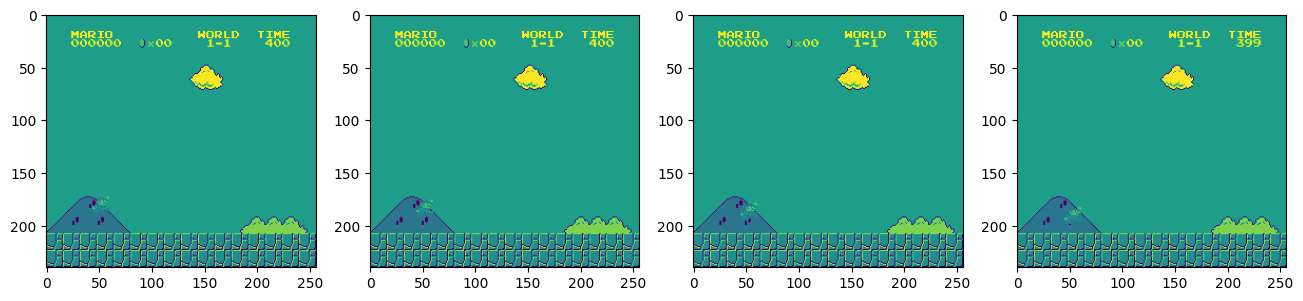

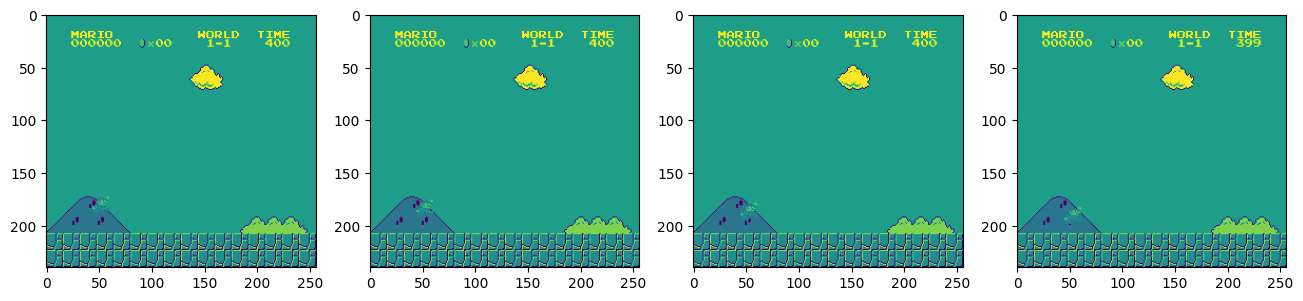

In [43]:
from IPython import display
done = True
plt.figure(figsize=(16,10))
for step in range(20):
    if done:
        state = env.reset()
    state, reward, done, info = env.step([env.action_space.sample()])
    
    
    for i in range(state.shape[3]):
        plt.subplot(1,4,i+1)
        plt.imshow(state[0,:,:,i])
        
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.1)

    #env.render()
env.close()  

## Training

In [39]:
!pip uninstall stable_baselines3 -y
!pip install stable-baselines3[extra]==1.6.0

Found existing installation: stable-baselines3 2.2.1
Uninstalling stable-baselines3-2.2.1:
  Successfully uninstalled stable-baselines3-2.2.1
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     -------- ------------------------------- 0.3/1.5 MB 9.6 MB/s eta 0:00:01
     ---------------- ----------------------- 0.6/1.5 MB 7.9 MB/s eta 0:00:01
     ---------------------------- ----------- 1.1/1.5 MB 8.8 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 8.9 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      error in gym setup command: 'extras_require' must be a dictionary whose values are strings or lists of strings containing valid project/version requirement specifiers.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [11]:
import stable_baselines3
from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3.ppo import CnnPolicy
from stable_baselines3.common.callbacks import BaseCallback

LOG = "./logs/"
model = PPO(CnnPolicy, env, verbose=1, tensorboard_log=LOG,learning_rate=0.00001)

Using cuda device
Wrapping the env in a VecTransposeImage.


In [12]:
model.learn(total_timesteps=80000)

Logging to ./logs/PPO_1


c:\Users\Matthieu\Projets Python\MarioRL\.venv\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


-----------------------------
| time/              |      |
|    fps             | 70   |
|    iterations      | 1    |
|    time_elapsed    | 28   |
|    total_timesteps | 2048 |
-----------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 47         |
|    iterations           | 2          |
|    time_elapsed         | 85         |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.00722609 |
|    clip_fraction        | 0.0271     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.94      |
|    explained_variance   | -0.00155   |
|    learning_rate        | 1e-05      |
|    loss                 | 19.4       |
|    n_updates            | 10         |
|    policy_gradient_loss | -0.00291   |
|    value_loss           | 102        |
----------------------------------------
-----------------------------------------
| time/   

In [13]:
model.save("ppo_CNN_mario")

Une methode pour voir l'évolution de mario au fil du temps, serait de sauvegarder tous les X steps le model actuel, et puis tous les tester à la suite à la toute fin

## Test

In [29]:
state = env.reset()
SIMPLE_MOVEMENT[model.predict(state)[0][0]]

['right']

In [16]:
model = PPO.load("ppo_CNN_mario")

In [ ]:
state = env.reset()
while True:
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)

    env.render()